In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Tuesday February 18**.  Students must come to class the next day prepared to discuss the material covered in this assignment. answer

# Pre-Class Assignment: Introduction to Machine Learning

### Goals for today's pre-class assignment 

</p>

1. [Introduction to Machine Learning](#Introduction_to_Machine_Learning)
2. [Classifier Comparison](#Classifier_Comparison)
2. [Example using the digits dataset](#Example_using_the_digits_dataset)
4. [Assignment wrap-up](#Assignment_wrap-up)

----
<a name="Introduction_to_Machine_Learning"></a>
# 1. Introduction to Machine Learning
The following video introduces many key concepts in machine learning. Watch the video and answer associated questions in the Assignment Wrap-up:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("f7YB73F0zDo",width=640,height=360)

In this notebook we will be using the scikit learn (sklearn) module for machine learning. More information on sklearn can be found here:

http://scikit-learn.org/stable/

&#9989; **<font color=red>QUESTION:</font>**  What is the difference between Supervised and Unsupervised machine learning?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>** What is the difference between Regression and Classification models?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>**  What machine learning libraries available for python (Name at least two)?

Put your answer to the above question here.

----
<a name="Classifier_Comparison"></a>
# 2. Classifier Comparison

The [scikit-learn](https://scikit-learn.org/) Python library has many different machine learning algrithms. Lets explore some of these algorithms.

&#9989; **<font color=red>DO THIS:</font>** Read though the [Classfier Comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) page on the Scikit-Learn website, download the example (I recommend the jupyter notebook) and see if you can get it to run.  (NOTE: This loops over a lot of different classifiers so make sure you give it plenty of time to run).  


&#9989; **<font color=red>QUESTION:</font>**  Were you able to get the classifier comparison code working? If not, where did you get stuck?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>**  Have you ever heard or used of any of these classifiers?  If so which ones? 

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>**  There are three different datasets in the output (Rows).  WHich classifiers (Columns) worked best for each dataset?  (HINT: THe accuracy is a little hard to read but printed in the lower right hand corner of each graph.

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>**  Based on these three datasets. Which classifier of the 10 shown is the best? Explain why.

Put your answer to the above question here.

----
<a name="Example_using_the_digits_dataset"></a>
# 3. Example using the digits dataset

Let's look at another example by downloading a dataset of images called "digits" which is included in the sklearn (Scikit Learning) library.  You should just be able to run the code and see the results.

In [14]:
%matplotlib inline
# First things first. Let's import some of the modules we'll use

import numpy as np
import scipy.linalg

import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as datasets

import matplotlib.pyplot as plt

sk_data = datasets.load_digits();

The following video is a little longer than usual.  However, some may find it useful to learn more how to explore variables in python. Example used are also from scikit learn so that could be helpful too. **Note:** This video was made over a year ago and you may see slightly different output if you try to follow along:

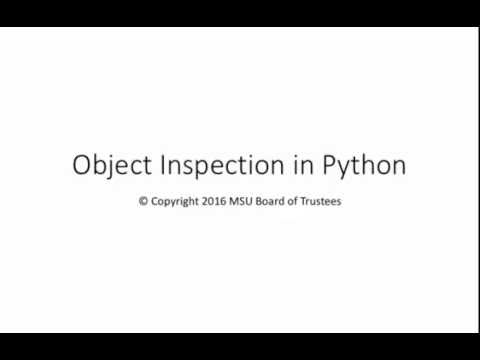

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("NzysdpexqsM",width=640,height=360)

We can use the python ```type``` command to see that the sklearn package stores a dataset in something called a "Bunch" object:

In [3]:
type(sk_data)

sklearn.utils.Bunch

We can use the ```dir``` command to review the contents of the object:

In [4]:
dir(sk_data)

['DESCR', 'data', 'images', 'target', 'target_names']

The 'DESCR' variable is a string the describes where the database came from and what is in it:

In [5]:
print(sk_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

As we can see from the above the dataset consists of 5620 images each of size $8 \times 8$.  I wrote the following code to let us review these images and their given labels:

In [6]:
#Simple slider to go though all of the images in a sklearn dataset
from ipywidgets import interact

def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.show()

    interact(view_image, i=(0,n-1))
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

interactive(children=(IntSlider(value=898, description='i', max=1796), Output()), _dom_classes=('widget-intera…

The following code will declare some new variables to make it easier to work with the data:

In [7]:
images = sk_data.images
categories = sk_data.target_names
class_labels = sk_data.target

----
## Step A: Feature Extraction

Feature Extraction is one of the most important step for machine learning.  A feature vector is a set of numbers that represent the key information from the image we want to use as input to our model.  The label is the output that we want our model to learn.  

The most simple feature vector for images is to use a vector with a length equal to the number of pixels.  In this case we have small $8 \times 8$ images so we have a feature vector that is just 64 numbers long.  These feature vectors are stored in the ```sk_data.data``` variable already so we don't need to unwrap the images:

In [8]:
feature_vectors = sk_data.data
feature_vectors.shape

(1797, 64)

----
## Step B: Splitting the dataset for model into training and testing sets
The next step in any machine learning problem is to split the data in a training set and testing set. We want to randomly select 75% of the data for training and 25% of the data for testing.  

We could write our own function to split the data, however, since this is a very common step, scikit learn comes with a function we can use:

In [9]:
# STEP B

from sklearn.model_selection import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)


print(len(train_vectors))
print(len(test_vectors))


1347
450


----
## Step C: Select and train a Classifier using the training dataset.
There are a lot of machine learning algorithms we could use to train our classifier.  All of them have different pros and cons. You can see a list and comparison of algorithms here:

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

For this exercise we will use one of the more common algorithms which is called a Support Vector Machine (SVM).  The following video gives a brief description on how a SVM works. This video was created for a different class and talks a little about that class homework, however, the overview should help with this class:

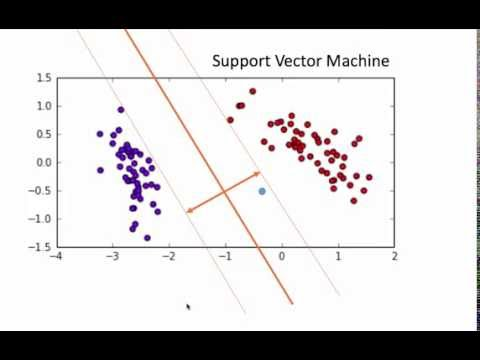

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("Zw3FClKgJaM",width=640,height=360)

The following code will train the Support Vector Machine (SVM) using the ```train_vectors``` and ```train_labels```.  The resulting model will be called ```clf``` or classifier.  Note a lot is going on in these functions.  We will not get into the details, lets just accept the following values as reasonable starting points (actually, I just got these values from an example I found on-line):

In [11]:
# STEP C

###############################################################################
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(train_vectors, train_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


&#9989; **<font color=red>QUESTION:</font>** Did you get a message in red when you ran the above code?  Try to determine if this message is important and if you should fix it.

Put your answer to the above question here.

----
## Step D. Show the results of the classification on the testing dataset

The next step is to see how well our classifier worked on data we did not use for training.  In this step we use the classifier we trained in the previous set to try to predict the labels for our testing set:

In [12]:
# STEP D1
pred_labels = clf.predict(test_vectors)

The following code makes a gallery of images and shows their predicted label to their actual label:

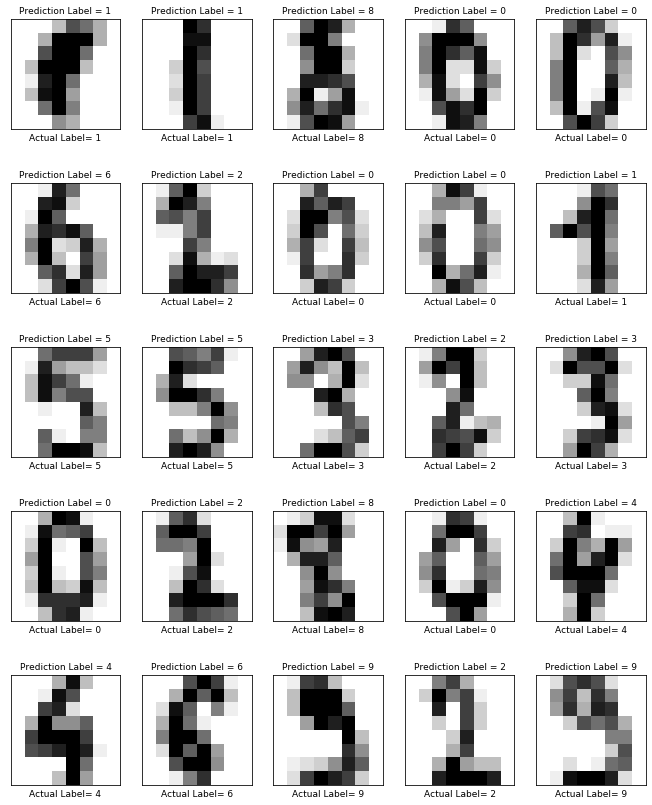

In [18]:
def plot_gallery(images, true_titles, pred_titles, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        image = test_vectors[i].reshape((8,8))
        plt.imshow(image, cmap=plt.cm.gray_r)
        plt.title('Prediction Label = '+str(categories[true_titles[i]]), size=9)
        plt.xlabel('Actual Label= '+str(categories[pred_titles[i]]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(images, test_labels, pred_labels)

scikit learn also comes with functions to help compare the true categories with the predicted categories.  These will summarize the error and provide a confusion matrix:

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_labels, pred_labels))
print(confusion_matrix(test_labels, pred_labels, labels=range(10)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.95      1.00      0.97        54
           2       1.00      1.00      1.00        34
           3       1.00      0.98      0.99        47
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        41
           6       1.00      0.98      0.99        42
           7       0.98      1.00      0.99        44
           8       1.00      0.96      0.98        46
           9       0.97      0.97      0.97        38

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  1]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0

----
<a name="Assignment_wrap-up"></a>
# 4. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link to Google Form](https://cmse.msu.edu/cmse802-pc-survey)


If you have trouble with the embedded form, please make sure you log on with your MSU google account at [googleapps.msu.edu](https://googleapps.msu.edu) and then click on the direct link above.

&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** No assignment specific quation.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse802-pc-survey?embedded=true" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above Google From on or before the assignment due date.

### Course Resources:

- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vTW4OzeUNhsuG_zvh06MT4r1tguxLFXGFCiMVN49XJJRYfekb7E6LyfGLP5tyLcHqcUNJjH2Vk-Isd8/pub)
- [Preliminary Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vRsQcyH1nlbSD4x7zvHWAbAcLrGWRo_RqeFyt2loQPgt3MxirrI5ADVFW9IoeLGSBSu_Uo6e8BE4IQc/pubhtml?gid=2142090757&single=true)
- [Course D2L Page](https://d2l.msu.edu/d2l/home/912152)

&#169; Copyright 2020,  Michigan State University Board of Trustees